# Titanic Dataset:

**Objectives:** 
- Load and clean the dataset, perform univariate and bivariate analysis, and visualize survival trends. 

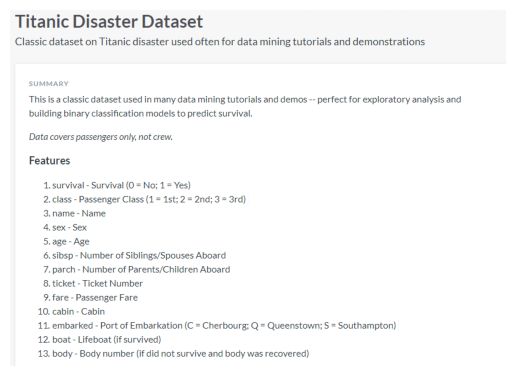

--------------------

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

-------------------------

## Load Dataset:

In [4]:
df=pd.read_excel('D:/Bistartx Intership/Month-1/EDA_Titanic/titanic3.xls')
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
947,3,1,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S,13,NaN,NaN
870,3,1,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,NaN,NaN,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
891,3,0,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S,NaN,285.0,NaN
1194,3,0,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


---------------------

## Errors Handling

**Observations**
1. Round values in the Fare column to two decimal places for consistency.
2. Handle missing values appropriately to maintain data integrity.
3. Remove uninformative columns that do not contribute to the analysis.

**Handle missing values appropriately to maintain data integrity.**

### Dealing with Missing values/ Duplicate values

<Figure size 800x600 with 0 Axes>

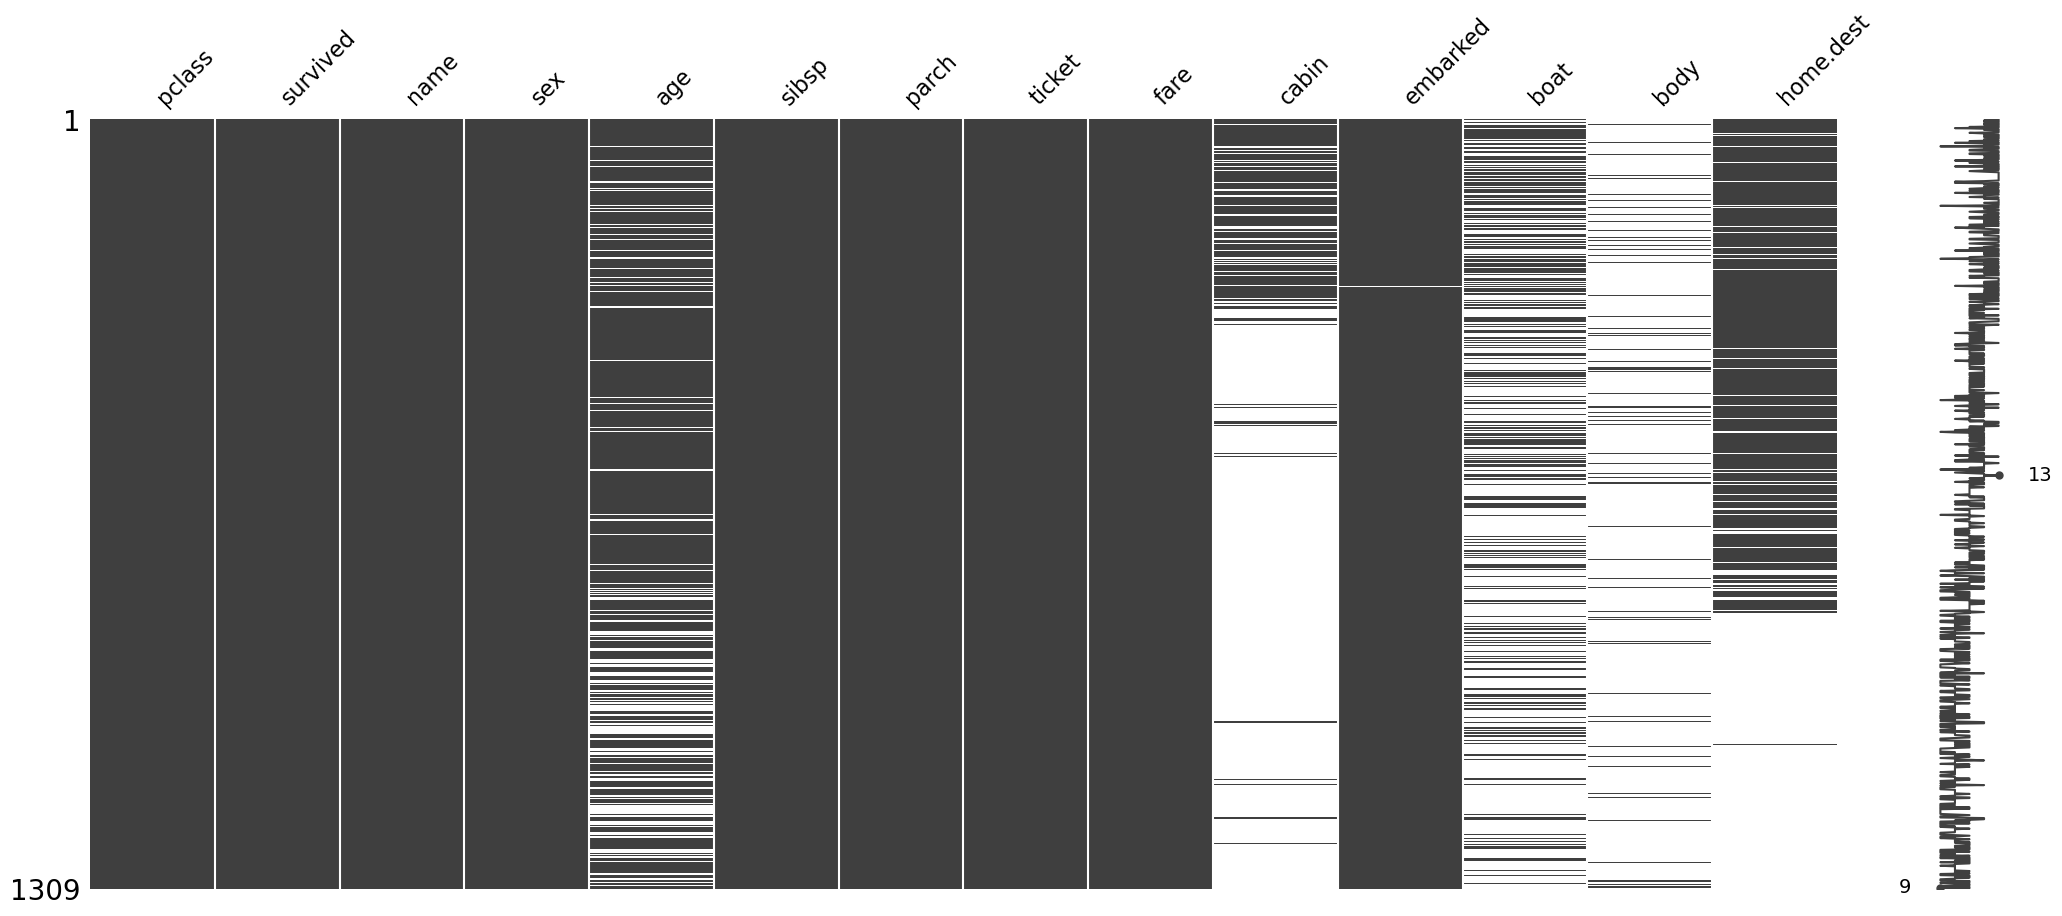

In [6]:
plt.figure(figsize=(8,6))
msno.matrix(df)
plt.show()

- `Age` column values are MCAR.
- `cabin`,`boat`,`body`,`home.dest` columns values are not MCAR.


In [7]:
percentage_missing = ((df.isnull().sum() / len(df)) * 100).round(2)
print(percentage_missing)

pclass        0.00
survived      0.00
name          0.00
sex           0.00
age          20.09
sibsp         0.00
parch         0.00
ticket        0.00
fare          0.08
cabin        77.46
embarked      0.15
boat         62.87
body         90.76
home.dest    43.09
dtype: float64


**Observations**
1. Since `cabin`, `boat`, `body`, and `home.dest` have too many missing values and don’t provide useful information, remove them using:
2. Fill missing values of `age` `fare` and `embarked`.

**Remove uninformative columns that do not contribute to the analysis**

In [8]:
df.drop(columns=['cabin','boat','body','home.dest'], axis=1, inplace=True)

In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


**Before filling missing values, we first analyze the column's distribution to determine the most appropriate imputation method**

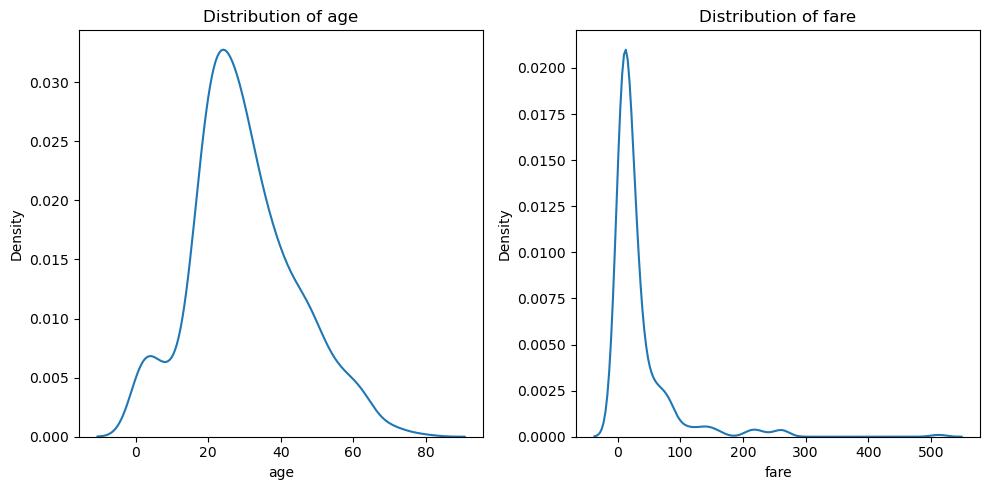

In [10]:
plt.figure(figsize=(10,5))
cols = ['age', 'fare']

for i , col in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**Median is best method for that**

In [11]:
cols = ['age', 'fare']

for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [12]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [13]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

**Round values in the Fare column to two decimal places for consistency**

In [14]:
df['fare'] = df['fare'].round(2)
df['fare'].head()

0    211.34
1    151.55
2    151.55
3    151.55
4    151.55
Name: fare, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


**Issues related to errors and missing values have been resolved successfully.**

**Check Duplicates in data**

In [16]:
df[df.duplicated()].sum()

pclass        0
survived      0
name          0
sex           0
age         0.0
sibsp         0
parch         0
ticket        0
fare        0.0
embarked      0
dtype: object

**No Duplicates in data**

--------------------

## Exploratory Data Analysis:

### Univariate Analysis - Numerical Features

**Checking Outliers using Boxplot**

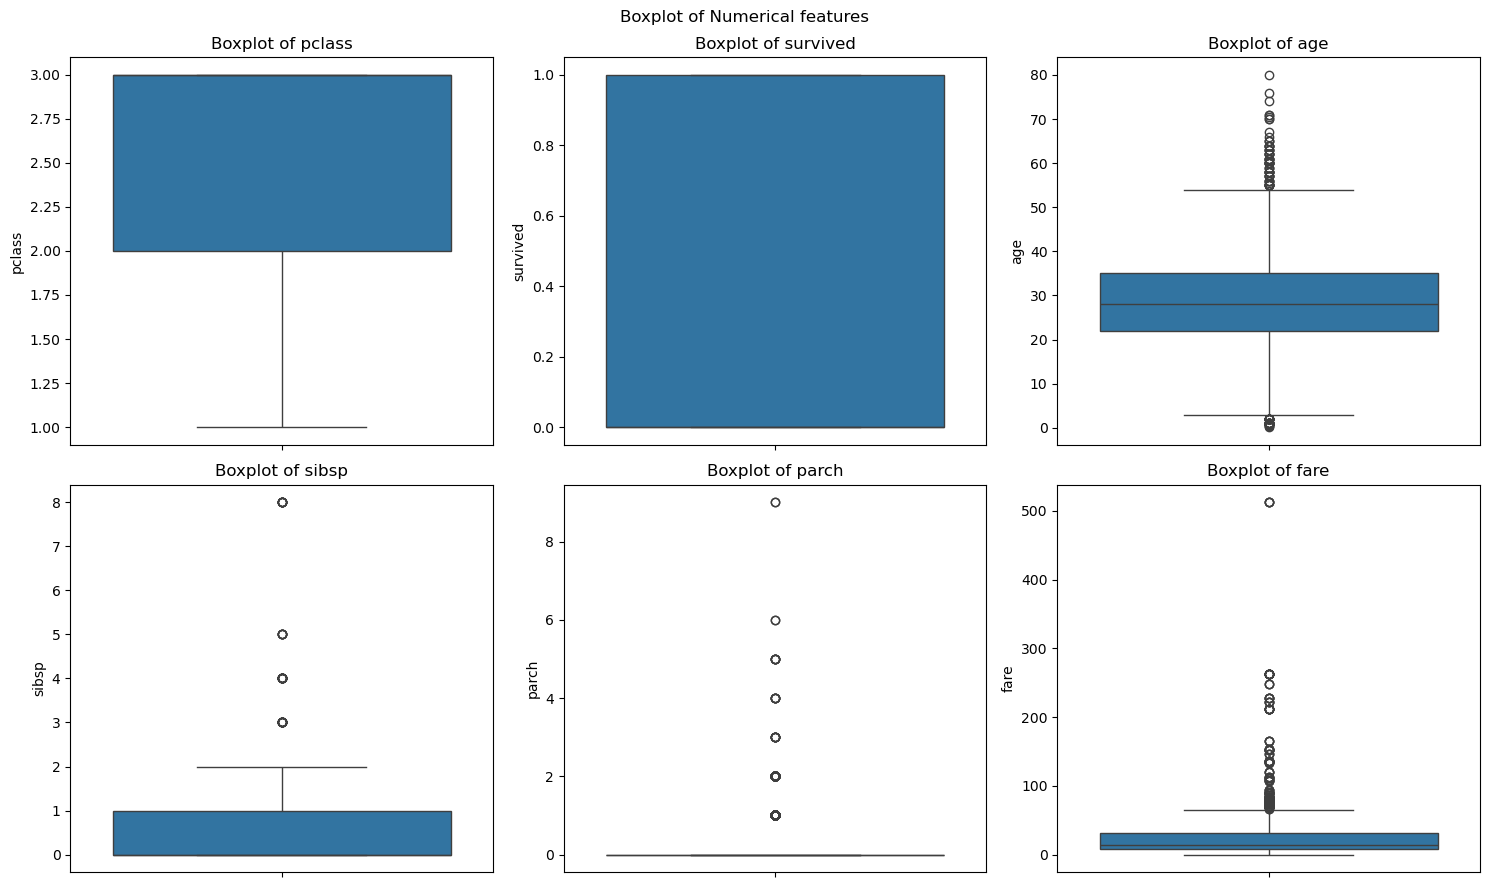

In [17]:
plt.figure(figsize=(15,9))

for i , col in enumerate(df.select_dtypes(include='number')):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.suptitle('Boxplot of Numerical features')
plt.tight_layout()
plt.show()

**Observations**

**`AGE`**
- Since most passengers were adults (ages 20–40), the IQR method considers young children (<5) and elderly passengers (>60) as outliers because they differ from the majority.
    - Titanic had many children and elderly passengers, particularly in third class (families) and first class (wealthy elderly travelers).
  
**`SIBSP`**
- Since most passengers traveled alone (SibSp = 0) or with one family member (SibSp = 1), the method considers large families (SibSp ≥ 3) as outliers because they deviate from the majority.
    - Titanic carried many large families, especially in third class, where families immigrating to America often traveled together. 

**`Parch`**
- Since most passengers traveled alone (SibSp = 0) or with one family member (SibSp = 1), the method considers large families (SibSp ≥ 3) as outliers because they deviate from the majority.
    - Titanic carried many large families, especially in third class, where families immigrating to America often traveled together, making them distinct from the typical solo or small-group travelers.

**`Fare`**
- Since most passengers paid a moderate fare ($10–$30), the method considers very expensive fares (>$50) as outliers because they deviate from the majority.
    - Titanic had a distinct class structure, with first-class passengers often paying significantly higher fares for luxury accommodations, making them stand out from the typical fare distribution.
  

**Distribution Plot**

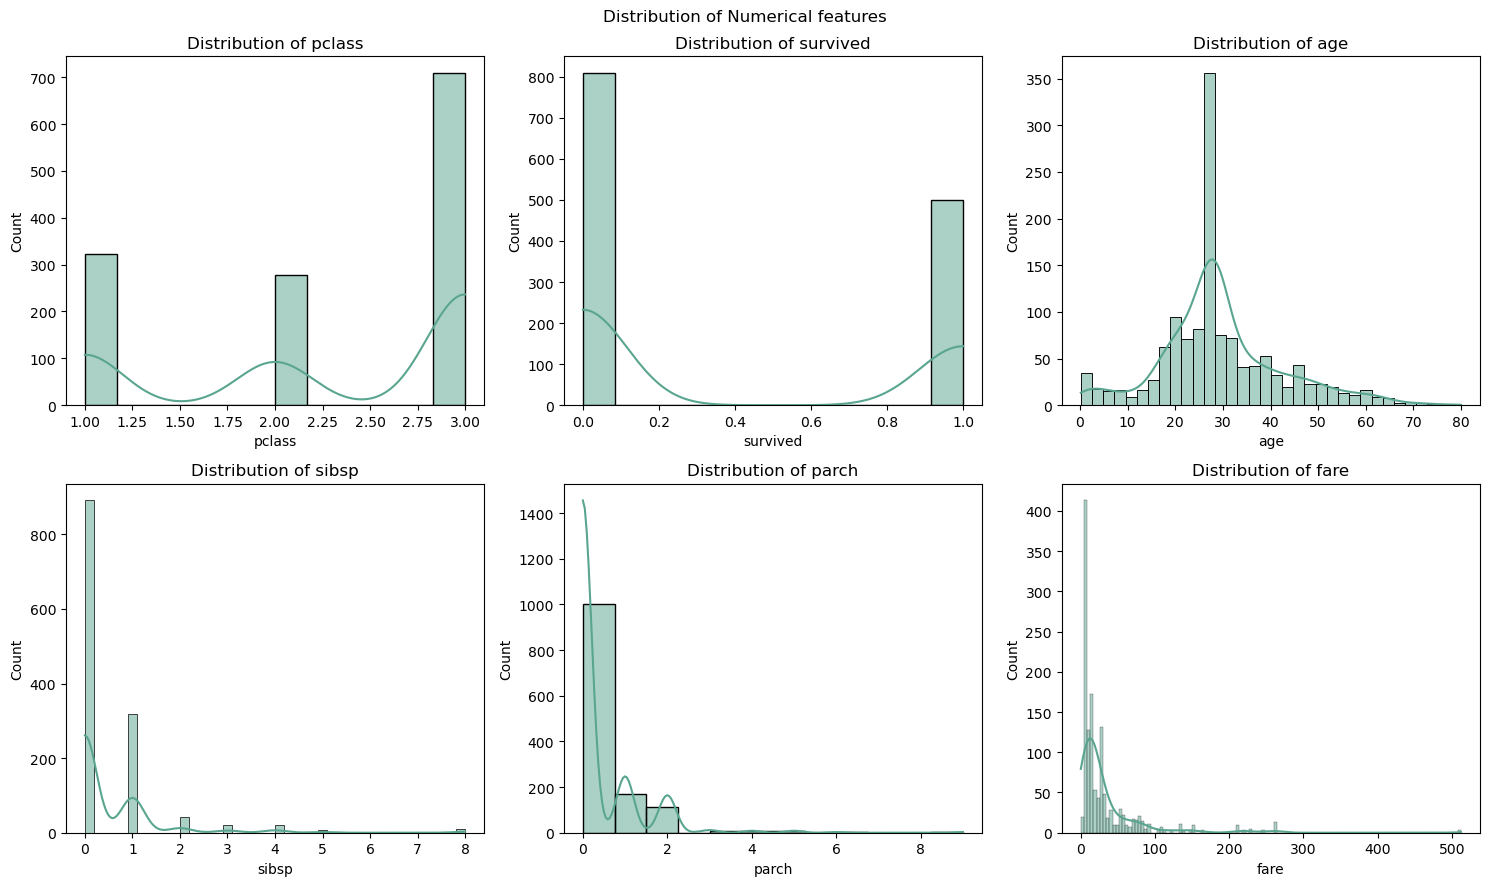

In [18]:
plt.figure(figsize=(15,9))

for i , col in enumerate(df.select_dtypes(include='number')):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=col, kde=True, color=sns.color_palette("crest")[1])
    plt.title(f'Distribution of {col}')
plt.suptitle('Distribution of Numerical features')
plt.tight_layout()
plt.show()

**Observations**
- The majority of passengers traveled in `3rd class`, making it the most common travel class on the Titanic.
    - 3rd class tickets were more affordable compared to 1st and 2nd class.
- The number of `non-surviving` passengers is higher than the number of survivors.
    - Where factors such as class, gender, and access to lifeboats played a significant role in survival rates.
- The majority of `passengers` on the Titanic were between the ages of 15 and 40.
    - This age group was also diverse in terms of class distribution, with younger individuals more commonly found in 3rd class, often immigrating to America.
- The majority of passengers on the Titanic were `solo travelers` or those traveling with only `one sibling or spouse`.
    - Larger family groups were less common and were mostly found in third class, where families often traveled together.
- Most passengers on the Titanic had `Parch` (Parents/Children) between `0 and 2`.
    - Large family groups (Parch ≥ 3) were relatively rare and were more commonly found in third class, where entire families immigrating together were more prevalent.
- Most passengers on the Titanic paid a `fare` ranging between `$10 and $50`.
    - Indicating that the majority traveled in second or third class, where ticket prices were more affordable. 

### Univariate Analysis - Catergorical features

**Count Plot**

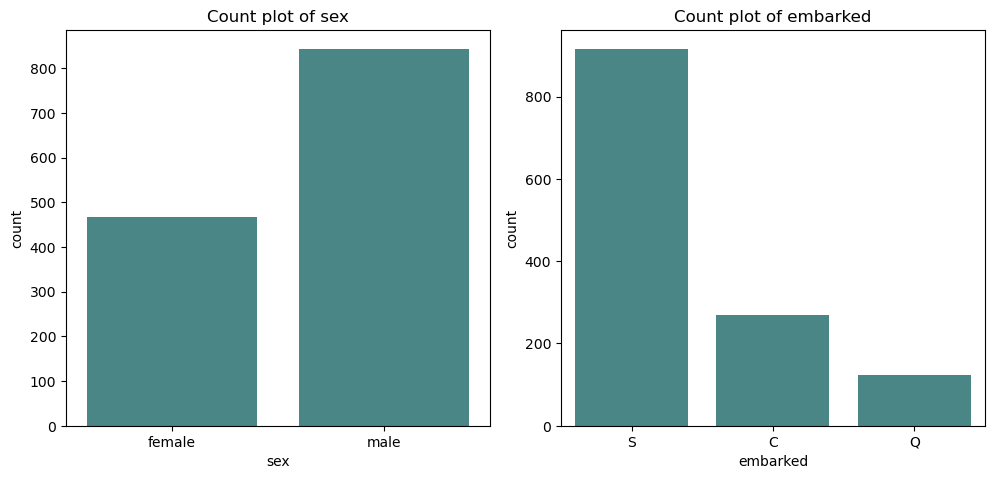

In [19]:
plt.figure(figsize=(15,9))

for i , col in enumerate(['sex', 'embarked']):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col,color=sns.color_palette("crest")[2])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

**Observations**
- The majority of passengers on the Titanic were `male`, outnumbering `female` passengers significantly.
    - Men were more likely to be traveling alone for work, migration, or business.
- Most passengers on the Titanic embarked from Southampton, making it the primary departure point compared to Queenstown and Cherbourg.
    - This is expected since Southampton was the Titanic’s home port and a major hub for transatlantic travel, attracting a large number of third-class passengers, including immigrants seeking new opportunities in America.

### Bivariate Analysis

**Survival Rate by Passenger Class / Sex / Embarked**

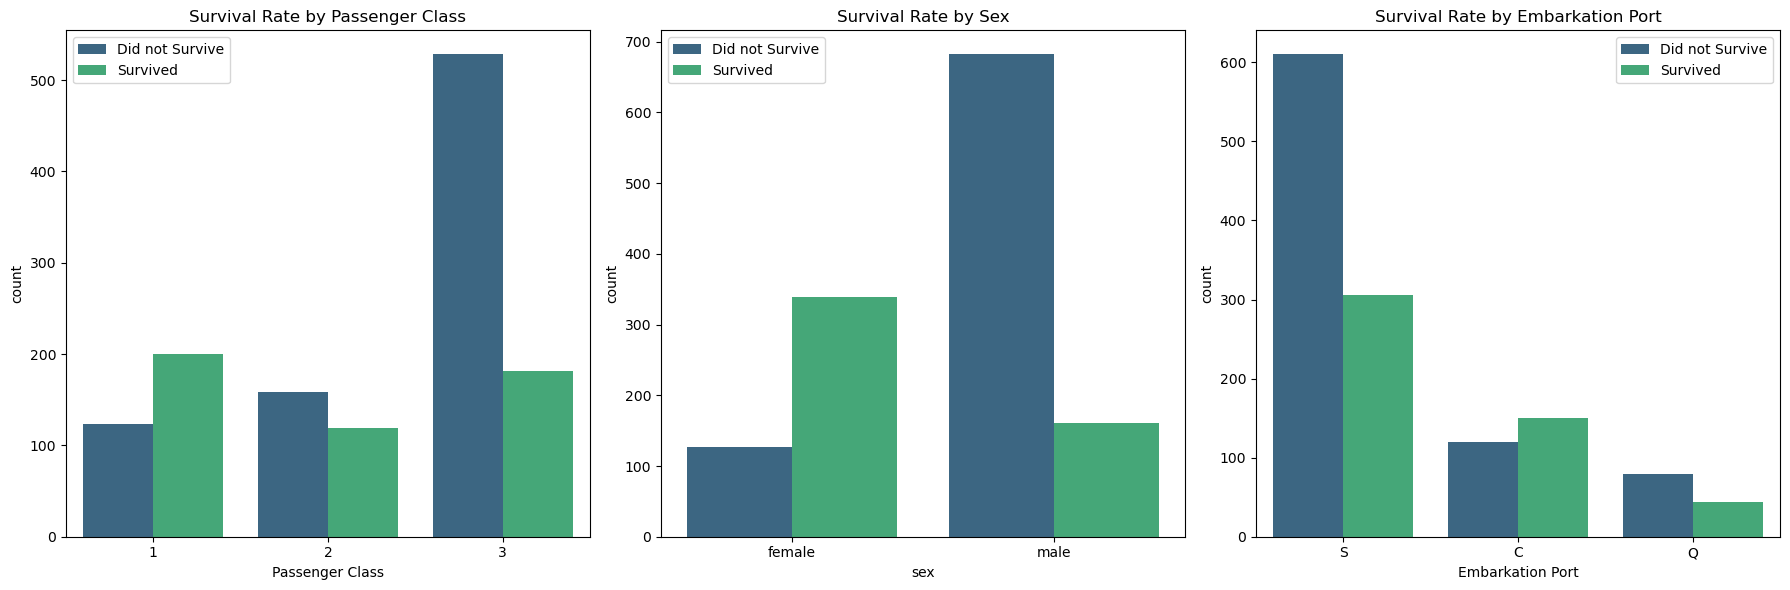

In [20]:
plt.figure(figsize=(18, 6)) 

# Survival by Passenger Class
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='pclass', hue='survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel("Passenger Class")
plt.legend(["Did not Survive", "Survived"])

# Survival by Sex
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sex', hue='survived', palette='viridis')
plt.title('Survival Rate by Sex')
plt.legend(["Did not Survive", "Survived"])

# Survival by Embarked Port
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='embarked', hue='survived', palette='viridis')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel("Embarkation Port")
plt.legend(["Did not Survive", "Survived"])

plt.tight_layout() 
plt.show()

**Observations**
- `Passengers in 1st class had a higher survival rate` due to the presence of VIPs and wealthy individuals.
- `Passengers in 3rd class had the highest non-survival rate` since it mostly consisted of male workers and immigrants, who were given lower priority during evacuation and had limited access to lifeboats.
  
- `Female passengers had a higher survival rate than male passengers` due to the "women and children first" policy.
- `From Southhampton,the survival rate was lower` compared to Cherbourg and Queenstown. This could be due to the fact that Southampton was the port of embarkation for the majority of passengers, and the ship's departure from there might have led to a higher number of casualties.

**Survival Rate by Age / Fare / sibsp / parch**

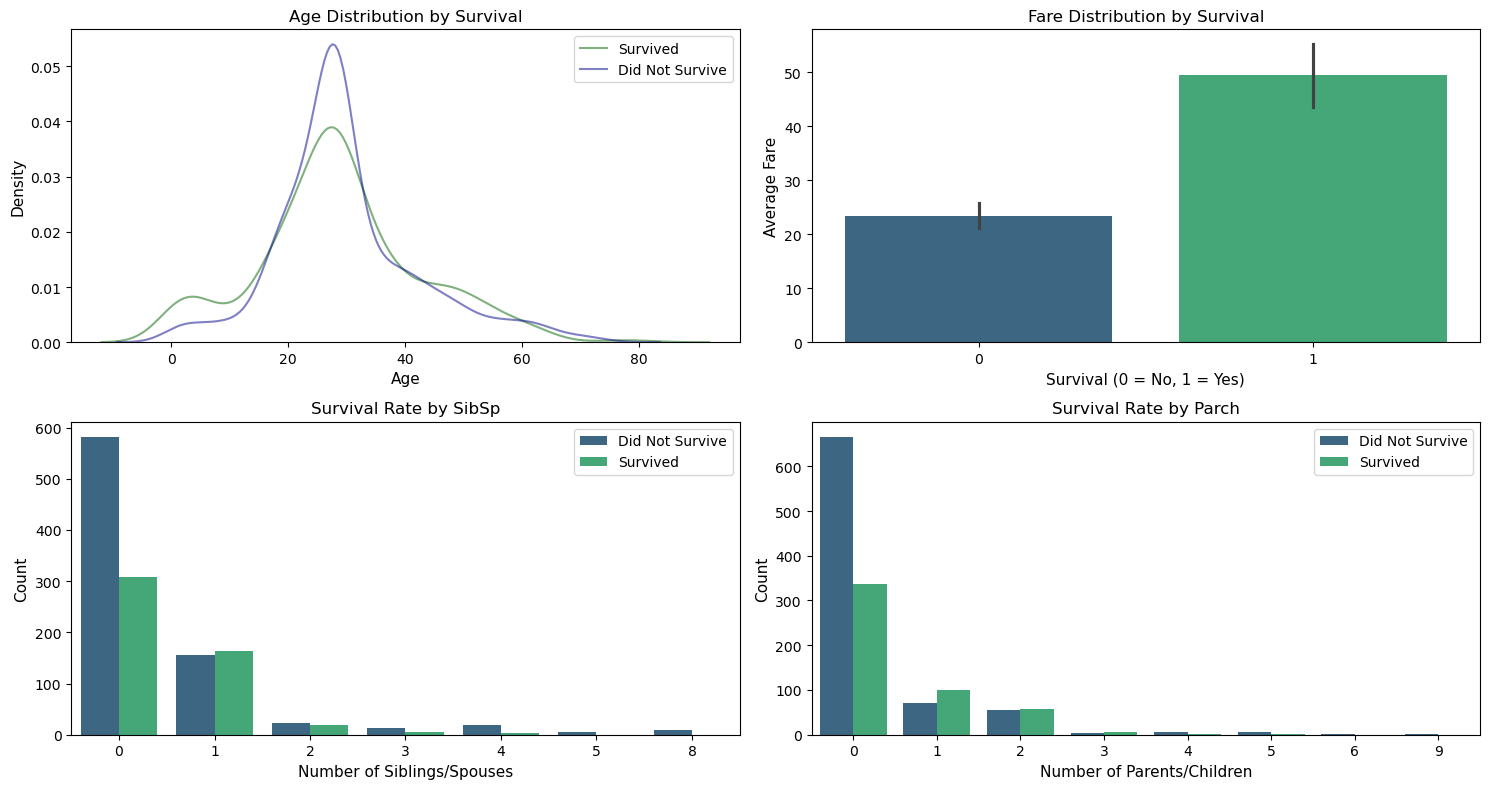

In [ ]:
plt.figure(figsize=(15,8))


plt.subplot(2, 2, 1)
sns.kdeplot(df[df['survived'] == 1]['age'], label="Survived", color="darkgreen", alpha=0.5)
sns.kdeplot(df[df['survived'] == 0]['age'], label="Did Not Survive", color="darkblue", alpha=0.5)
plt.title("Age Distribution by Survival", fontsize=12)
plt.xlabel("Age", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.legend()


plt.subplot(2, 2, 2)
sns.barplot(data=df, x='survived', y='fare', hue=None, palette='viridis')
plt.title("Fare Distribution by Survival", fontsize=12)
plt.xlabel("Survival (0 = No, 1 = Yes)", fontsize=11)
plt.ylabel("Average Fare", fontsize=11)


plt.subplot(2, 2, 3)
sns.countplot(data=df, x='sibsp', hue='survived', palette='viridis')
plt.title("Survival Rate by SibSp", fontsize=12)
plt.xlabel("Number of Siblings/Spouses", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.legend(["Did Not Survive", "Survived"])


plt.subplot(2, 2, 4)
sns.countplot(data=df, x='parch', hue='survived', palette='viridis')
plt.title("Survival Rate by Parch", fontsize=12)
plt.xlabel("Number of Parents/Children", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.legend(["Did Not Survive", "Survived"])

plt.tight_layout()
plt.show()

**Observations**
- The majority of `survivors are between the ages of 15 to 40`, while `non-survivors are mostly concentrated around 15 to 30`.
- `Passengers who paid higher fares had a greater chance of survival`, likely due to better accommodations and priority access to lifeboats
- `Passengers with 0 or 1 sibling/spouse (SibSp)` had lower survival rates, indicating that traveling alone or with just one companion did not significantly improve their chances of survival
- `Passengers with 0 or 1 parent/child (Parch)` had lower survival rates, suggesting that traveling alone or with just one family member did not significantly improve their chances of survival.

### Visulizing survival trends

In [ ]:
total_passengers = df['survived'].count()
print(f'Total passengers on the Titanic: {total_passengers}')

percentage_survived = (df['survived'].sum() / total_passengers) * 100
print(f'Percentage of passengers who survived: {percentage_survived:.2f}%')

Total passengers on the Titanic: 1309
Percentage of passengers who survived: 38.20%


**Survival rate by gender**

sex
female    25.897632
male      12.299465
Name: survived, dtype: float64


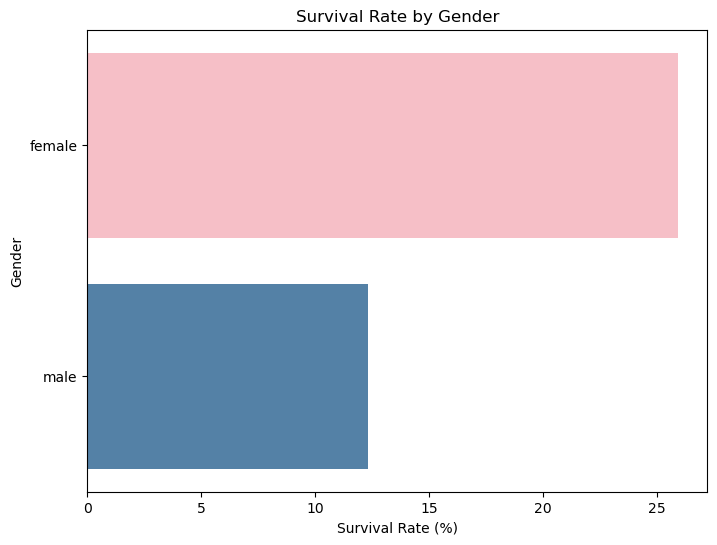

In [23]:
gender_survival = (df.groupby('sex')['survived'].sum() / total_passengers) * 100

gender_survival_df = gender_survival.reset_index()
gender_survival_df.columns = ['Gender', 'Survival Rate (%)']
print(gender_survival)

# Barplot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(y='Gender', x='Survival Rate (%)', data=gender_survival_df, palette=['#FFB6C1','#4682B4'])

plt.title('Survival Rate by Gender')
plt.ylabel('Gender')
plt.xlabel('Survival Rate (%)')
plt.show()

**Survival rate by fare category**

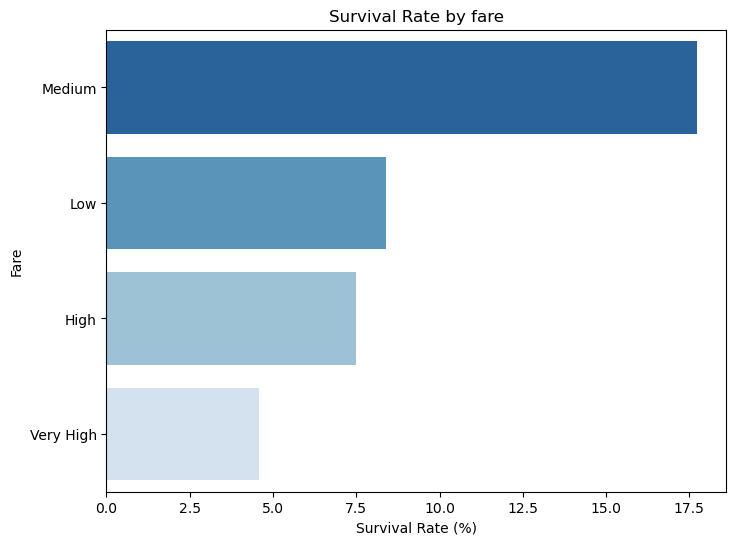

In [43]:
bins = [0, 10, 50, 100, df['fare'].max()] 
labels = ['Low', 'Medium', 'High', 'Very High']
df['fare_category'] = pd.cut(df['fare'], bins=bins, labels=labels, include_lowest=True)

fare_survival = (df.groupby('fare_category')['survived'].sum() / total_passengers) * 100

fare_survival = fare_survival.reset_index()
fare_survival.columns = ['Fare Category', 'Survival Rate (%)']
fare_survival = fare_survival.sort_values(by='Survival Rate (%)', ascending=False)

# Barplot for survival rate by fare
plt.figure(figsize=(8, 6))
sns.barplot(y='Fare Category', x='Survival Rate (%)', data = fare_survival, order=fare_survival['Fare Category'],
            palette = 'Blues_r' )

plt.title('Survival Rate by fare')
plt.ylabel('Fare')
plt.xlabel('Survival Rate (%)')
plt.show()


**Survival rate by age group**

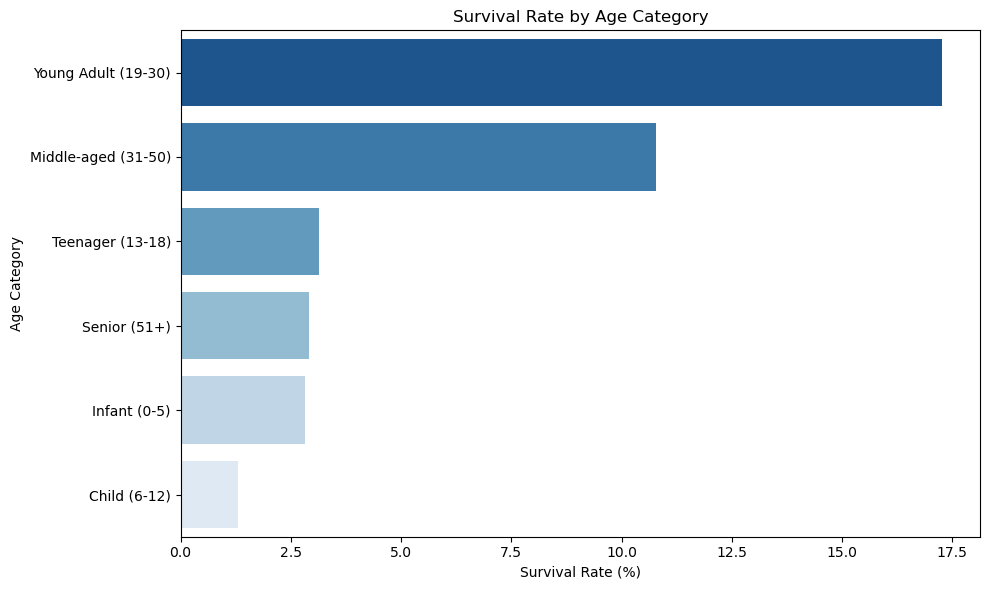

In [45]:
bins = [0, 5, 12, 18, 30, 50, df['age'].max()]
labels = ['Infant (0-5)', 'Child (6-12)', 'Teenager (13-18)', 'Young Adult (19-30)', 'Middle-aged (31-50)', 'Senior (51+)']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

age_survival = (df.groupby('age_category')['survived'].sum() / total_passengers) * 100

age_survival = age_survival.reset_index()
age_survival.columns = ['Age Category', 'Survival Rate (%)']
age_survival = age_survival.sort_values(by='Survival Rate (%)', ascending=False)

# Barplot for survival rate by age
plt.figure(figsize=(10, 6))
sns.barplot(y='Age Category', x='Survival Rate (%)', data=age_survival, order = age_survival['Age Category'],
            palette= 'Blues_r')

plt.title('Survival Rate by Age Category')
plt.xlabel('Survival Rate (%)')
plt.ylabel('Age Category') 
plt.tight_layout()
plt.show()

**Survival rate by passenger class**

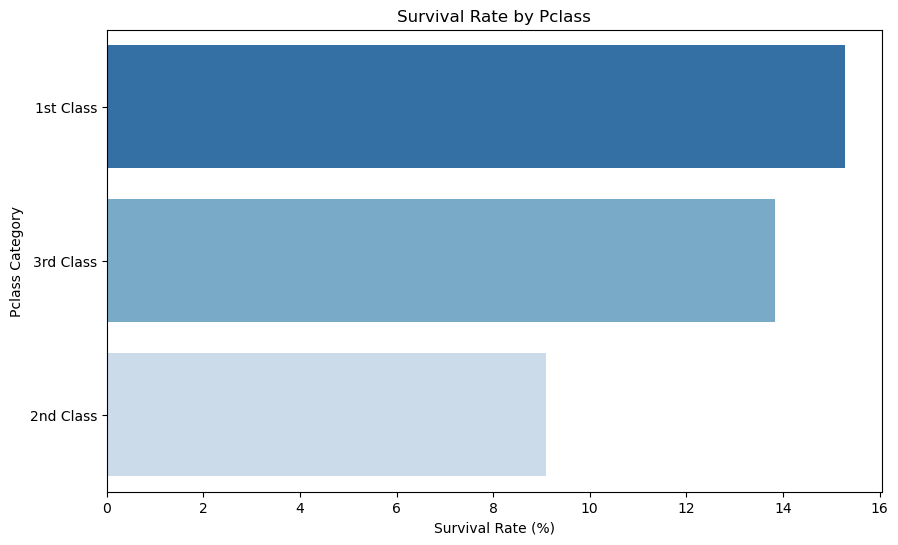

In [48]:
bins = [0, 1, 2, df['pclass'].max()]
labels = ['1st Class', '2nd Class', '3rd Class']
df['pclass_category'] = pd.cut(df['pclass'], bins=bins, labels=labels, include_lowest=True)

pclass_survival = (df.groupby('pclass_category')['survived'].sum() / total_passengers) * 100

pclass_survival = pclass_survival.reset_index()
pclass_survival.columns = ['Pclass Category', 'Survival rate (%)']
pclass_survival = pclass_survival.sort_values(by='Survival rate (%)', ascending=False)

# Barplot for survival rate by pclass
plt.figure(figsize=(10, 6))
sns.barplot(y='Pclass Category', x='Survival rate (%)', data = pclass_survival, order = pclass_survival['Pclass Category'],
            palette= 'Blues_r')

plt.title('Survival Rate by Pclass')
plt.ylabel('Pclass Category')
plt.xlabel('Survival Rate (%)')
plt.show()

**Survival rate by passenger class**

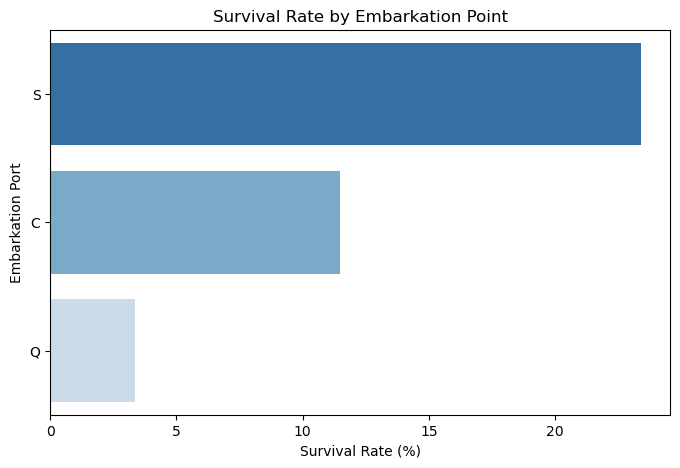

In [51]:
embarked_survival = (df.groupby('embarked')['survived'].sum() / total_passengers) * 100

embarked_survival = embarked_survival.reset_index()
embarked_survival.columns = ['Embarked', 'Survival Rate (%)']
embarked_survival = embarked_survival.sort_values(by='Survival Rate (%)', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(y='Embarked', x='Survival Rate (%)', data=embarked_survival, order=embarked_survival['Embarked'] ,
            palette= 'Blues_r') 

# Barplot for survival rate by Embarkation Point
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Embarkation Port')
plt.xlabel('Survival Rate (%)')
plt.show()


In [28]:
df=df.drop(columns=['fare_category', 'age_category', 'pclass_category'])

### Correlation Matrix

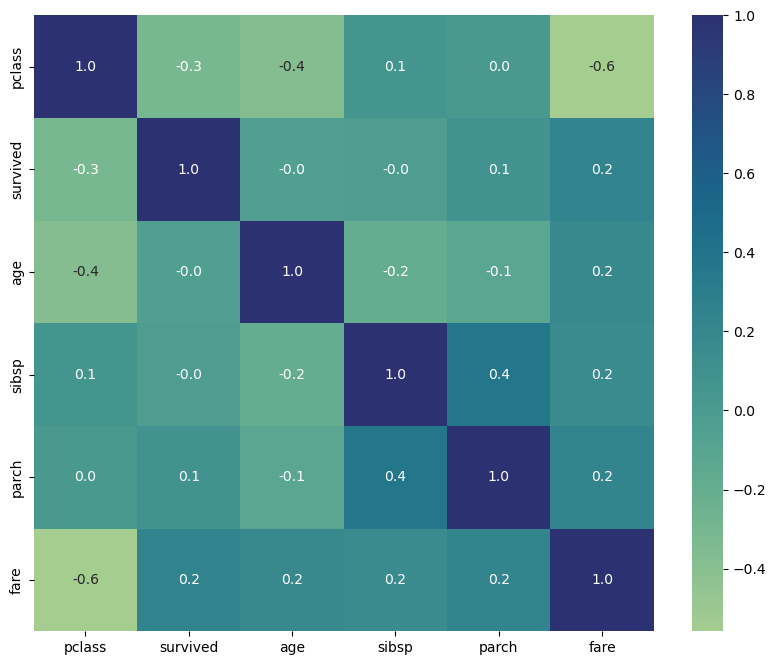

In [29]:
plt.figure(figsize=(10,8))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix,annot=True, cmap="crest",fmt=".1f")
plt.show()

---------------

## Insights and Recommendations

#### Survival Rate Trends Insights

**Overall survival rate**: 
- Approximately 38% of passengers survived.
- 62% of passengers did not survive.

**Class & Survival Disparity**
- First-class passengers had the highest survival rate (15.27%), while third-class had the lowest (13.82%).
- Limited access to lifeboats for third-class passengers contributed to the higher fatality rate.
- Wealthier passengers, often boarding from Cherbourg, had better survival odds.

**Gender Disparity in Survival**
- Female passengers had a much higher survival rate (25.89%) than males (12.29%).
- This aligns with the "women and children first" policy but highlights the vulnerability of male passengers, especially in third class.

**Age and Survival**

- The highest survival rate was among young adults (19-30) at 17.26%.
- Infants (0-5) and middle-aged (31-50) had lower survival rates.
- Elderly passengers (>60) had very low survival odds due to mobility challenges.

**Embarkation & Wealth Impact**
- Passengers from Cherbourg (C) had a higher survival rate (11.45%) due to a larger proportion of first-class travelers.
- Southampton passengers had the lowest survival rate (23.37%), indicating a higher proportion of third-class travelers.

**Family Influence (SibSp & Parch)**
- Passengers traveling alone had lower survival rates, as they lacked support during evacuation.
- Small families (1-2 members) had better survival rates, but large families (3+ members) struggled to evacuate together, reducing their survival odds.

**Fare and Survival**
- First-class passengers paid higher fares, indicating better access to safety resources.
- Higher-paying passengers had better survival odds, indicating priority access to safety resources.
- Low-fare passengers ($10–$20) had the highest non-survival rate, showing a direct correlation between ticket price and safety access.

#### Recommendations

**For Future Passenger Safety on Ships**
- Redesign Lifeboat Access: Ensure equal access to lifeboats regardless of class. Design more escape routes and remove physical barriers.
- Mandatory Lifeboat Training: Safety drills should be mandatory for all passengers, not just first-class.
- Improve Family Evacuation Protocols: Special procedures should be in place to help larger families evacuate together without delays.

**For Travel & Cruise Industry**
- Fairer Safety Perks: Safety advantages shouldn't be price-based. Cruise lines should offer equal priority evacuation procedures for all classes.
- Enhance Passenger Assistance: Elderly passengers and families should have dedicated crew support for safety training and emergency response.
- Improve Safety for Solo Travelers: Provide designated survival groups for passengers traveling alone to increase their survival odds in emergencies.

**For Further Historical & Research Studies**
- Crew Survival Analysis: Investigate how many crew members survived and their role in the evacuation process.
- Cabin Location Impact: Analyze whether cabin placement influenced survival rates (e.g., proximity to lifeboats).
- Social Status & Survival: Explore if well-connected individuals received better survival chances due to personal influence.